## Evaluating Environmental Impact of Exam Portfolio 

### Import Packages
To install packages run the ```setup.sh``` file in the terminal

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
from scipy.stats import zscore
import seaborn.objects as so

### Load in Emissions Data 
The data is located in the ```out``` folder, and each of the .csv files ending with a run-id are loaded in to investigate the impact of the different tasks in each assignment. The individual .csv files are loaded into one dataframe, with columns containing the following information: 
- task_name: The manually specified name of the task
- project_name: The manually specified name of the assignment in which the task was performed
- duration: The time the task took to run, in seconds
- emisions: The approximate emisions from this task, in CO₂-equivalents, in kg. 
- emissions_rate: The emissions per second (kg/s) (*this value is very small and approximately the same for all tasks, therefore it is multiplied by 1000, to be able to compare the tasks*)

Additionally an aggregated dataframe is made, with the total emissions and duration for each assignment. 

In [142]:
emissions = pd.DataFrame()
for file in sorted(glob.glob(os.path.join("out/", "emissions_*"))):
    emissions = pd.concat([emissions, pd.read_csv(file, usecols=[0,2,4,5,6])])
emissions = emissions.sort_values(by= "project_name").reset_index(drop=True)
emissions["emissions_rate"] = emissions["emissions_rate"]*10000
emissions_total = emissions[["project_name", "duration", "emissions"]].groupby(["project_name"]).sum().reset_index()

In [81]:
emissions

,task_name,project_name,duration,emissions,emissions_rate
0,Feature extraction,Assignment-1,187.111034,1.722601e-03,0.092064
1,Load spacy model,Assignment-1,1.346084,1.240391e-05,0.092032
2,Visualising features,Assignment-1,7.817864,7.197657e-05,0.092056
3,Load vectorised data (MLP),Assignment-2,0.013223,1.350464e-07,0.089390
4,Load vectorised data (LR),Assignment-2,0.010718,1.060970e-07,0.088965
5,Vectorize data,Assignment-2,11.030644,1.014808e-04,0.092057
6,Define vectorizer,Assignment-2,0.004021,3.588011e-08,0.085580
7,Load data,Assignment-2,0.377494,3.493013e-06,0.091971
8,Evaluate LR model,Assignment-2,0.047111,4.300415e-07,0.091365
9,Fit LR model,Assignment-2,0.066405,6.069169e-07,0.091582


In [4]:
emissions_total

,project_name,duration,emissions
0,Assignment-1,196.274982,0.001807
1,Assignment-2,2473.259483,0.022768
2,Assignment-3,13.349394,0.000123
3,Assignment-4,5208.031479,0.047947


To identify the *types* of tasks that emit the most, and to visualise these across the four assignments all tasks have been assigned one of the following groups. 'Feature extraction'  indicates when a large model is used in extracting features or creating embeddings, 'Fit model (GS)' indicates the use of gridsearch in fitting the model and 'Data wrangling' is any task where data is handled without any other actions. 

In [143]:
emissions["task_group"] = [
    "Feature extraction", "Load model", "Plotting", 
    "Load data", "Load data", "Feature extraction", "Define model", "Load data", "Evaluate model", "Fit model", 
    "Load data", "Fit model (GS)", "Plotting", "Evaluate model", "Fit model", "Load data", "Plotting", "Evaluate model", 
    "Fit model (GS)", "Evaluate model", "Feature extraction", "Data wrangling", "Data wrangling", "Load model", "Load data", 
    "Feature extraction", "Data wrangling", "Plotting" ]

### Visualization of Emissions Data

#### Total Emissions
The total emissions are inferred from the summing of the individual tasks, the emissions are in CO₂eq.

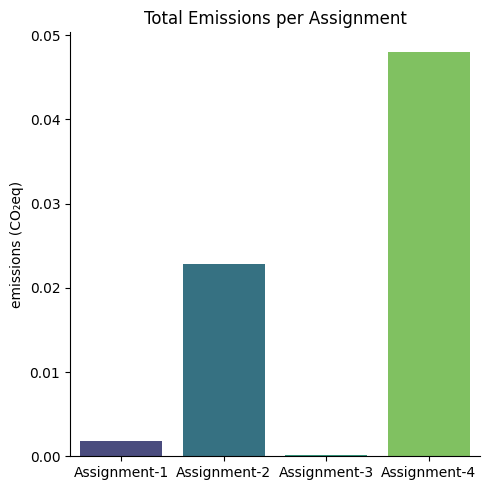

In [144]:
g = sns.catplot(data=emissions_total, 
            x="project_name", 
            y="emissions", 
            hue = "project_name", 
            kind="bar", 
            palette = sns.mpl_palette("viridis", 4), 
            )
g.set_axis_labels("", "emissions (CO₂eq)")
plt.title("Total Emissions per Assignment")
plt.savefig("plots/total_emissions.png", bbox_inches='tight')

#### Task Emissions
The task level emissions are shown as a percentage of the total emission from the individual assignment.

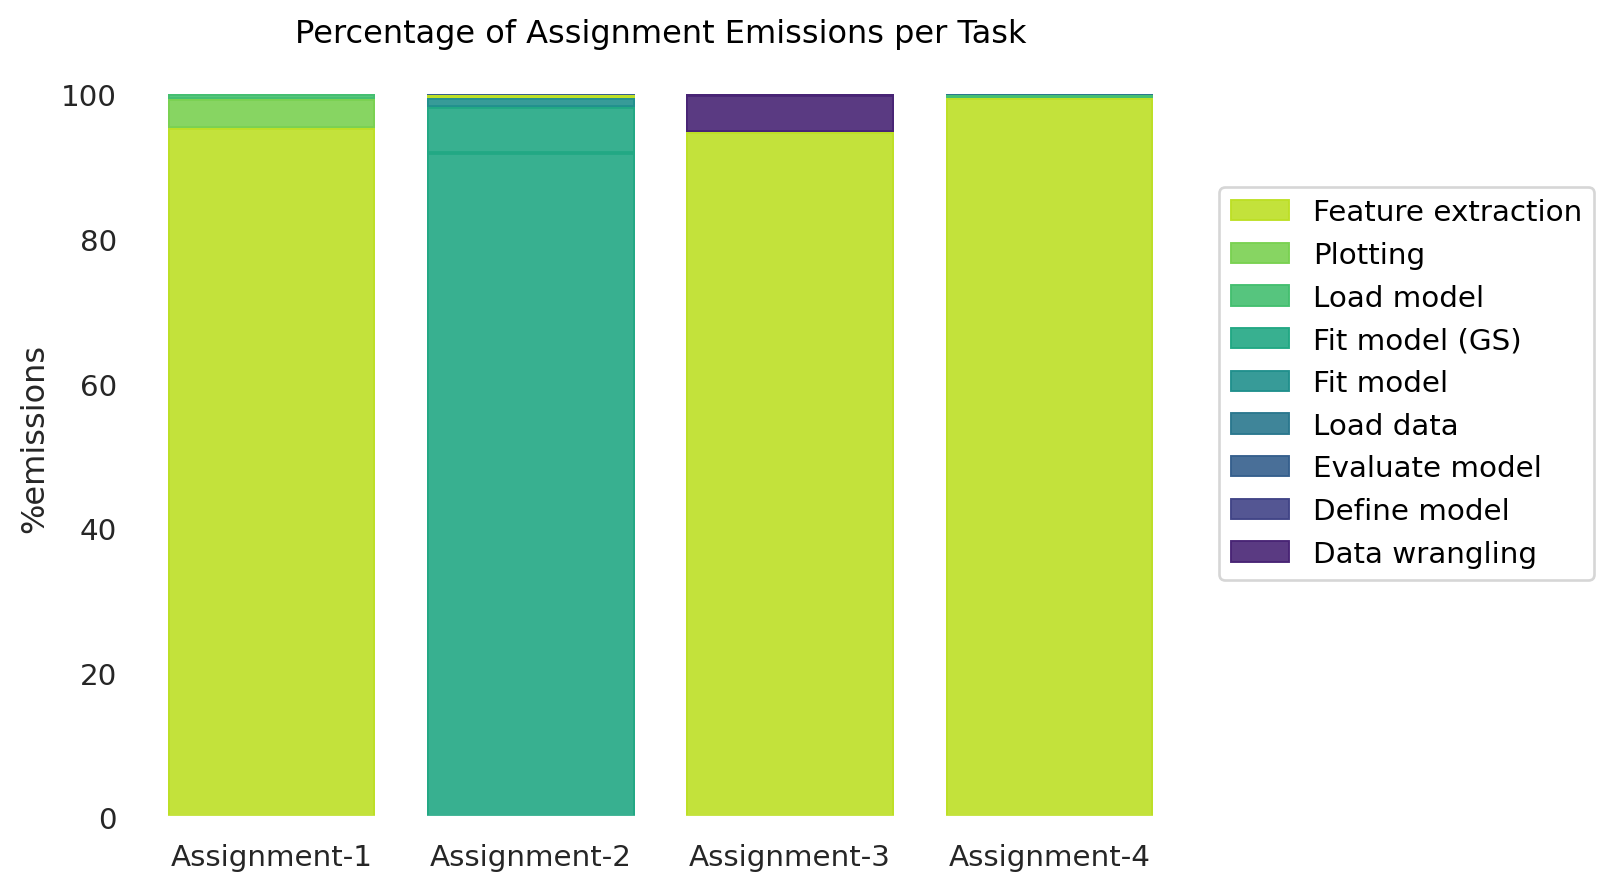

In [145]:
emissions['percent_emissions'] = emissions['emissions'] / emissions.groupby('project_name')['emissions'].transform('sum')*100
emissions = emissions.sort_values(by= ["project_name", "percent_emissions"], ascending=[True, False]).reset_index(drop=True)
p = so.Plot(emissions, x="project_name",  y="percent_emissions", color="task_group").add(so.Bar(edgewidth=0.7, alpha = 0.9, edgealpha=1), so.Stack()).scale(color =sns.mpl_palette("viridis_r", 9))
p = p.theme({"axes.facecolor": "w"})
p = p.label(x="", y="%emissions", color="", title="Percentage of Assignment Emissions per Task")
p.save("plots/perc_emmissions.png", bbox_inches='tight')

#### Assignment 2 - Text Classification Benchmarks
In assignment 2 several tasks were performed several times, because two classifiers were trained. Additionally, gridsearch was implemented, which was cost heavy and did not contribut a lot to the performance. Therefore, a plot visualing just assignment two was made: 

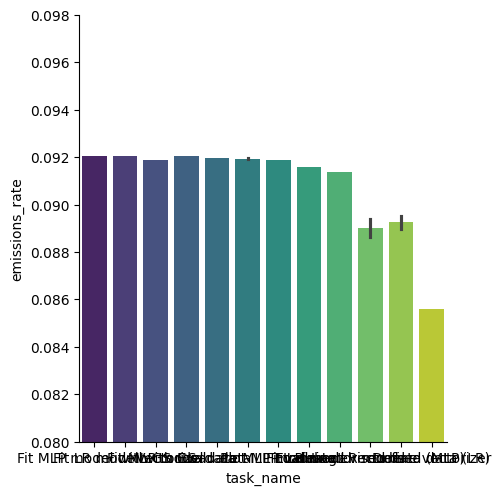

In [155]:
assignment2 = emissions[emissions["project_name"] == "Assignment-2"]
g = sns.catplot(data=assignment2, 
            x="task_name", 
            y="emissions_rate", 
            hue = "task_name", 
            kind="bar", 
            palette = sns.mpl_palette("viridis", 12), 
            )
g.set(ylim = (0.08,0.098))

In [100]:
max_task = (emissions.groupby(["project_name"]).max(["emissions"]).reset_index()).merge(emissions, how = "left")
max_task = max_task.rename(columns={"emissions":"emissions_task"})
max_task["emissions"] = emissions_total["emissions"]

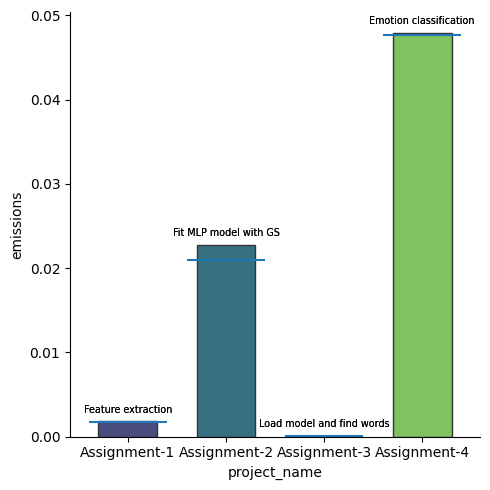

In [103]:
sns.catplot(data=emissions_total, 
            x="project_name", 
            y="emissions", 
            hue = "project_name", 
            kind="bar",
            palette = sns.mpl_palette("viridis", 4), 
            edgecolor = "0.2", 
            width = 0.6)
for task in range(0,4):
     plt.text(max_task.project_name[task], 
              max_task.emissions[task]+0.001, 
              max_task.task_name[task], 
              horizontalalignment='center', 
              size='x-small', 
              color='black', 
              weight='light')
for task in range(0,4):
     plt.text(max_task.project_name[task], 
              max_task.emissions[task]+0.001, 
              max_task.task_name[task], 
              horizontalalignment='center', 
              size='x-small', 
              color='black', 
              weight='light')
for task in range(0,4):
     plt.hlines(max_task.emissions_task[task], 
                task-0.4, 
                task+0.4)